In [1]:
from mylib.statistic_test import *
from mpl_toolkits.mplot3d import Axes3D

code_id = "0313 - Conditional Probability for Field Maintain"
loc = join(figpath, code_id, 'Position')
mkdir(loc)

# Need ~ 18 min
idx = np.where(f_CellReg_modi['maze_type'] != 0)[0]
if os.path.exists(join(figdata, f'{code_id} [Position].pkl')):
    with open(join(figdata, code_id+' [Position].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = DataFrameEstablish(variable_names = [
                             'Duration', 'Position', 'Conditional Prob.', 'Conditional Recover Prob.',
                             'Paradigm', 'On-Next Num', 'Off-Next Num'], 
                             f_member=['Type'], file_idx=idx,
                             f = f_CellReg_modi, function = ConditionalProb_Interface_Position, 
                             file_name = code_id+' [Position]', behavior_paradigm = 'CrossMaze'
           )
    
idxs = [
    np.where((Data['Paradigm'] == 'CrossMaze')&(Data['Maze Type'] == 'Maze 1')&(Data['Type'] == 'Real'))[0],
    np.where((Data['Paradigm'] == 'CrossMaze')&(Data['Maze Type'] == 'Maze 2')&(Data['Type'] == 'Real'))[0],
    np.where((Data['Paradigm'] == 'HairpinMaze cis')&(Data['Type'] == 'Real'))[0],
    np.where((Data['Paradigm'] == 'HairpinMaze trs')&(Data['Type'] == 'Real'))[0],
    np.where((Data['Paradigm'] == 'ReverseMaze cis')&(Data['Type'] == 'Real'))[0],
    np.where((Data['Paradigm'] == 'ReverseMaze trs')&(Data['Type'] == 'Real'))[0]
]

file_names = ['MA', 'MB', 'HPf', 'HPb', 'MAf', 'MAb']

d:\SoftwareData\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\0313 - Conditional Probability for Field Maintain\Position is already existed!


# S10A Illustratin

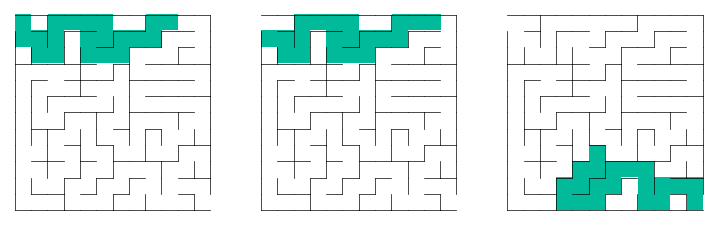

In [2]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(3*3,3))
ax1, ax2, ax3 = Clear_Axes(axes[0]), Clear_Axes(axes[1]), Clear_Axes(axes[2])
DrawMazeProfile(maze_type=1, axes=ax1, color='k', linewidth=0.5, nx=12)
DrawMazeProfile(maze_type=1, axes=ax2, color='k', linewidth=0.5, nx=12)
DrawMazeProfile(maze_type=1, axes=ax3, color='k', linewidth=0.5, nx=12)

CP = correct_paths[1]
mat = np.zeros(144)*np.nan
mat[CP[:20]-1] = 1
ax1.imshow(mat.reshape(12,12), cmap='terrain', vmin=0, vmax=4.6)
mat = np.zeros(144)*np.nan
mat[CP[1:21]-1] = 1
ax2.imshow(mat.reshape(12,12), cmap='terrain', vmin=0, vmax=4.6)
mat = np.zeros(144)*np.nan
mat[CP[-20:]-1] = 1
ax3.imshow(mat.reshape(12,12), cmap='terrain', vmin=0, vmax=4.6)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
ax1.axis([-0.8, 11.8, 11.8, -0.8])
ax2.axis([-0.8, 11.8, 11.8, -0.8])
ax3.axis([-0.8, 11.8, 11.8, -0.8])
#plt.savefig(join(loc, 'Illustration of Segment.png'), dpi = 600)
#plt.savefig(join(loc, 'Illustration of Segment.svg'), dpi = 600)
plt.show()

# S10 Remaining

C:\Users\12454\AppData\Local\Temp\ipykernel_32304\2147473918.py:10: RuntimeWarning: Mean of empty slice
  mat[j, k] = np.nanmean(


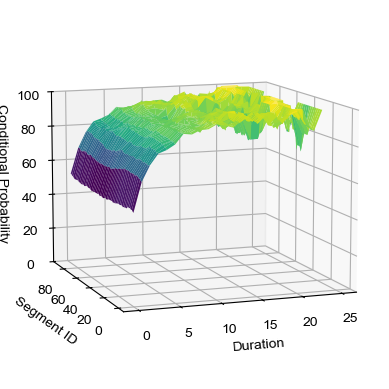

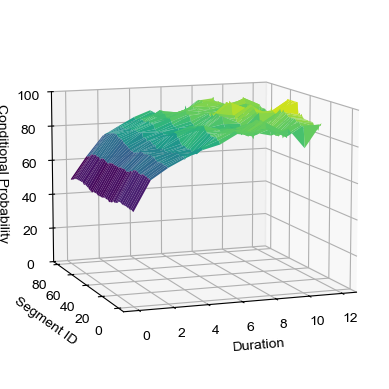

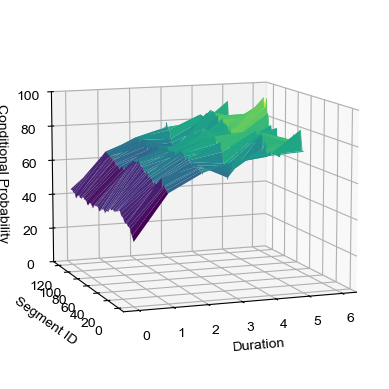

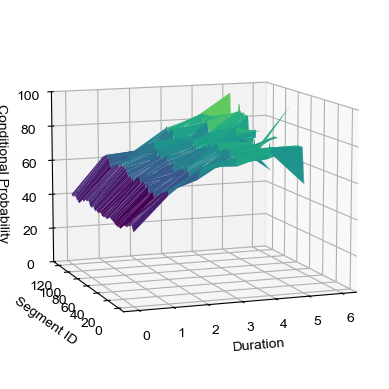

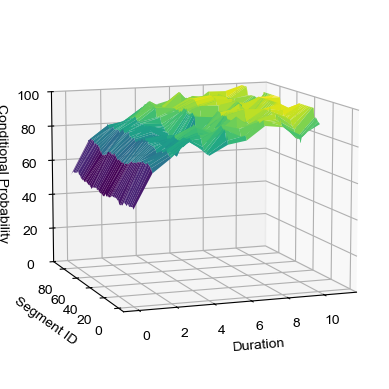

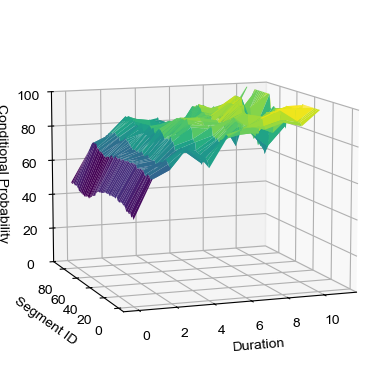

In [3]:
for i in range(len(idxs)):
    SubData = SubDict(Data, Data.keys(), idxs[i])
    
    seg_n = np.unique(SubData['Position']).shape[0]
    dur = int(np.nanmax(SubData['Duration']))
    mat = np.zeros((dur, seg_n))
    
    for j in range(dur):
        for k in range(seg_n):
            mat[j, k] = np.nanmean(
                SubData['Conditional Prob.'][np.where(
                    (SubData['Position'] == k+1)&(SubData['Duration'] == j+1)
                )[0]]
            )
    
    fig = plt.figure(figsize=(4,3))
    ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
    im = ax.imshow(mat.T, vmax=100)
    plt.colorbar(im, ax=ax)
    ax.set_xticks(np.arange(dur)+0.5)
    ax.set_aspect('auto')
    plt.savefig(join(loc, file_names[i]+'.png'), dpi = 600)
    plt.savefig(join(loc, file_names[i]+'.svg'), dpi = 600)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(np.arange(dur), np.arange(seg_n))
    # Plot the surface
    ax.plot_surface(X, Y, mat.T, cmap='viridis', vmax=100)

    # Add labels to the axes
    ax.set_xlabel('Duration')
    ax.set_ylabel('Segment ID')
    ax.set_zlabel('Conditional Probability')
    ax.set_zlim(0, 100)
    ax.view_init(10, -110)
    # Show the plot
    plt.savefig(join(loc, file_names[i]+'_3D.png'), dpi = 600)
    plt.savefig(join(loc, file_names[i]+'_3D.svg'), dpi = 600)
    plt.show()